# Story of Consumer Complaints

All the Import Statements needed for the given problem


In [1]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np

Loading the Customer complaints CSV file into Pandas

In [2]:
view_data = pd.read_csv('/home/anushya/Documents/Consumer_Complaints.csv')

/home/anushya/proj1/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Which Company tops among providing more number of Financial services and Products???

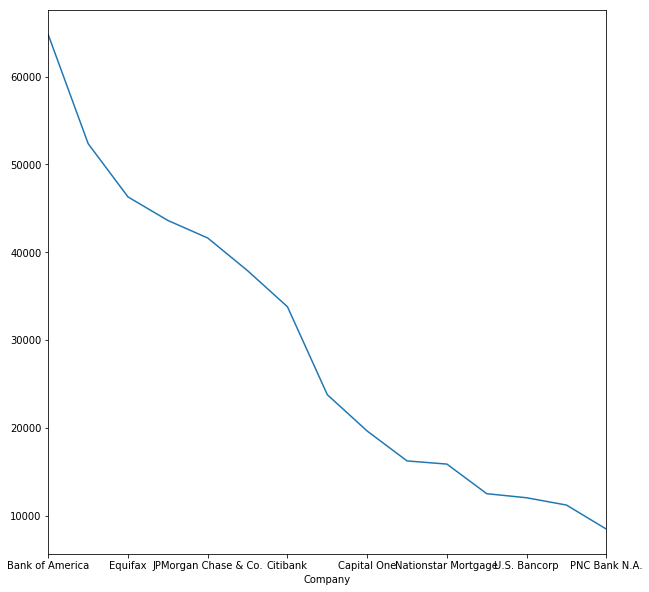

In [4]:
%matplotlib inline
company_group = view_data.groupby(['Company'])['Product'].agg('count')
company_group_sort = company_group.sort_values(ascending = False)[0:15]
company_group_sort.plot(figsize = (10,10))

# Highest number of issues related to which product and company??

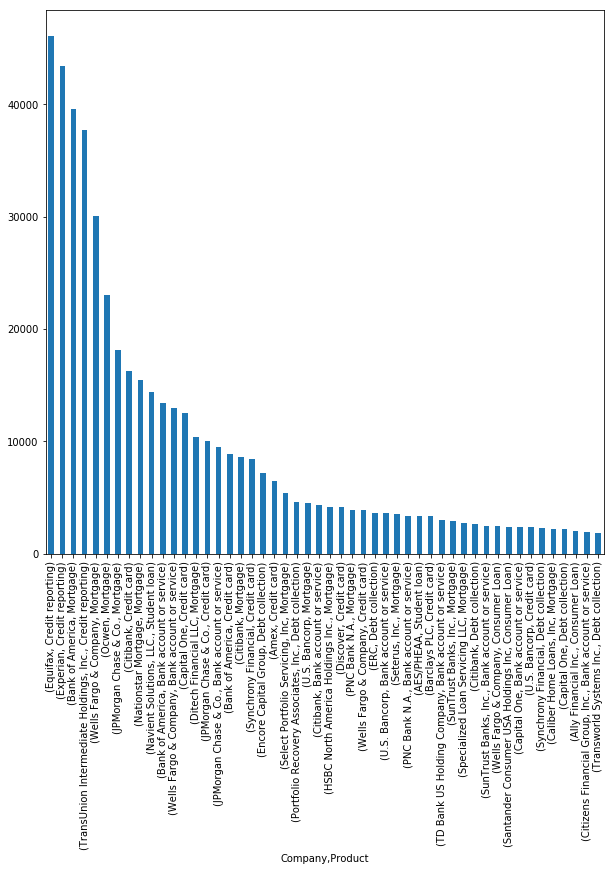

In [5]:
issue_product = view_data.groupby(['Company','Product'])['Issue'].agg('count')
issue_product_sort = issue_product.sort_values(ascending = False)[0:50]
issue_product_sort.plot(kind = 'bar',figsize = (10,10))

# Companies Disputed with the customers!!

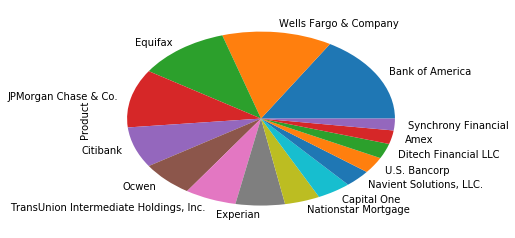

In [6]:
company_df = pd.DataFrame(view_data[['Company','Product','Consumer disputed?','Issue']])
consumer_dispute_df = company_df[company_df['Consumer disputed?'] == 'Yes']
Consumer_dispute_group = consumer_dispute_df.groupby('Company')['Product'].agg('count')
sort_group = Consumer_dispute_group.sort_values(ascending = False)[0:15]
sort_group.plot(kind = 'pie')

# How the issue counts varies every year for all company??

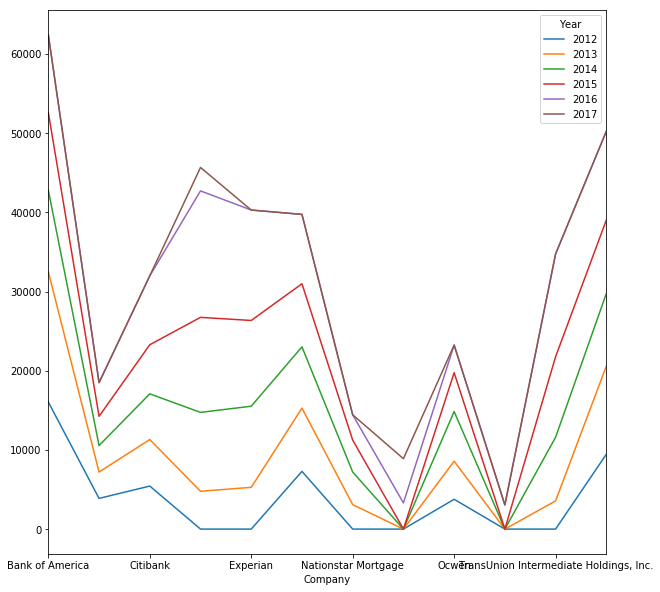

In [10]:
year_data = pd.DataFrame(view_data[['Date received','Issue','Company']])
year_data['Date received'] = pd.to_datetime(year_data['Date received'])
year_data['Year'] = year_data['Date received'].dt.year
year_group = year_data.groupby(['Company','Year'])['Issue'].agg('count')
year_sort = year_group.sort_values(ascending = False)[0:50]
new_group_df = year_sort.unstack(level=1)
new_group_df_plot = new_group_df
new_group_df_plot.plot(stacked = True,figsize =(10,10))


# Which Company tops among providing response to their customers on time?? 

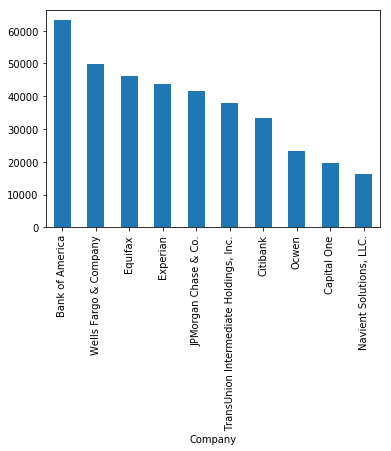

In [9]:
time_response_df = pd.DataFrame(view_data[['Company','Timely response?']])
response_df = time_response_df[time_response_df['Timely response?'] == 'Yes']
response_df_group = response_df.groupby('Company')['Timely response?'].agg('count')
response_plot = response_df_group.sort_values(ascending = False)[0:10]
response_plot.plot(kind = 'bar')